# Astronomical Classification: Identifying Objects with Machine Learning

- **Student Name:** Matthew Onstott
- **Student Pace:** Online (Self-Paced)
- **Scheduled Project Review Date/Time:** 
- **Instructor Name:** 
- **Blog Post URL:**

## 0. Table of Contents
- [1. Project Details](#1.-Project-Details)
- [2. Obtain the Data](#2.-Obtain-the-Data)
- [3. Scrub the Dataset](#3.-Scrub-the-Dataset)
- [4. Explore the Information](#4.-Explore-the-Information)
- [5. Model the Material](#5.-Model-the-Material)
 - [5.1. K-Means](#5.1.-K-Means-Clustering)
 - [5.2. DBSCAN](#5.2.-DBSCAN-Clustering)
 - [5.3. KNN](#5.3.-KNN-Classification)
 - [5.4. Logistic Regression](#5.4.-Logistic-Regression-Classification)
 - [5.5. SVM](#5.5.-SVM-Classification)
 - [5.6. Naive Bayes](#5.6.-Naive-Bayes-Classification)
 - [5.7. Decision Tree](#5.7.-Decision-Tree-Classification)
 - [5.8. Random Forest](#5.8.-Random-Forest-Classification)
 - [5.9. AdaBoost](#5.9.-AdaBoost-Classification)
 - [5.10. Gradient Boosting](#5.10.-Gradient-Boosting-Classification)
 - [5.11. Final Model Comparison](#5.11.-Final-Model-Comparison)
- [6. Interpret the Results](#6.-Interpret-the-Results)
 - [6.1. Recommendations](#6.1.-Recommendations)
 - [6.2. Areas for Future Study](#6.2.-Areas-for-Future-Study)

## 1. Project Details

### Dataset
The data used for this project is public information of space observations from [Data Release 14](http://www.sdss.org/dr14/) of the [Sloan Digital Sky Survey](https://www.sdss.org/). The Sloan Digital Sky Survey is a major multi-spectral imaging and spectroscopic redshift survey that has created the most detailed three-dimensional maps of the Universe that currently exist. It operates from Apache Point Observatory in New Mexico, USA, and has been in service since 2000. In its lifetime it has investigated more than one-third of the sky and taken spectra for more than three million astronomical objects.

The dataset is available in the [kaggle](https://www.kaggle.com/) data science community at this [link](https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey).  

The metadata includes the following:
- Number of observations = 10,000
- Number of features = 17
- Number of target class levels = 3 (Galaxy, Star, Quasar)

### Goal
The objective of this investigation is to classify an object as a Galaxy, Star, or Quasar. This will be accomplished by building and tuning machine learning models using the available predictor variables.

### Column Descriptions
1. **objid** = object identifier (within the photometric data)
2. **ra** = J2000 right ascension (measured in the r-band)
3. **dec** = J2000 declination (measured in the r-band)

 - Together, right ascension and declination the astronomical coordinates of a point in space can be specified (on the celestial sphere in the equatorial coordinate system).
 - Right ascension is the angular distance that is measured eastward along the celestial equator to the hour circle of the interrogated point in the sky.
 - Declination is measured north or south of the celestial equator along the hour circle passing through the interrogated point.
 - The Earth's axis rotates slowly around a circle, completing one cycle in about 26,000 years. This precession causes the coordinates of stationary celestial objects to change continuously. As a result, equatorial coordinates are relative to the year of their observation. This necessitates specifying coordinates in reference to a particular epoch (year). Coordinates from different epochs are mathematically rotated to match each other or a standard epoch. J2000 is the current standard epoch used.
 - SDSS employs 5 filters designed to let in light around specific wavelengths. The filters block out light at all wavelengths except around the wavelength they are designed to see. The r-band corresponds with the wavelength range for the **r** filter.


4. **u** = filter with wavelength 3,551Å and magnitude limit 22.0
5. **g** = filter with wavelength 4,686Å and magnitude limit 22.2
6. **r** = filter with wavelength 6,165Å and magnitude limit 22.2
7. **i** = filter with wavelength 7,481Å and magnitude limit 21.3
8. **z** = filter with wavelength 8,931Å and magnitude limit 20.5

 - The SDSS imaging camera collects photmetric imaging data using an array of 30 charge-coupled device (CCD) cameras arranged in six columns of five CCDs each. The pixel columns are aligned and the five filters each cover a row of the array.
 - Magnitude is a unitless measure of the brightness of an object in a defined band of wavelengths.
 - Limiting magnitude is the faintest apparent magnitude of a celestial body that is detectable by an instrument.
 
 
9. **run** = run number
10. **rerun** = rerun number
11. **camcol** = camera column
12. **field** = field number

 - A field is segment of an entire SDSS image with size 1361x2048 pixels.
 - Run number identifies the specific scan of an image.
 - Camcol identifies the scanline within the run and has values corresponding with the CCD columns, 1 to 6. 
 - Rerun specifies how an image was processed; each reprocessing is denoted by an integer, from the first at 0 to the most recent at 301.


13. **specobjid** = object identifier (within the spectral data)
14. **class** = identifies an object as a galaxy, star, or quasar

 - A galaxy is a gravitationally-bound system of stars, stellar remants, interstellar gas, dust, and dark matter.
 - A star is a lumnious spheroid of plasma held together by gravity.
 - A quasar, or quasi-stellar object (QSO), is an active galactic nucleus that is extremely lumnious and emits an extremely large amount of energy. 


15. **redshift** = redshift of the object
16. **plate** = plate number
17. **mjd** = modified julian date
18. **fiberid** = fiber identification number

 - Redshift occurs when electromagnetic radiation from an object increases in wavelength (i.e., is shifted to the red end of the spectrum).
 -  SDSS measures spectra by using an alumnium disk (plate) placed in the focal plane of the telescope where each plate corresponds to a specific patch of sky.
 - Modified julian date (MJD) is an integer corresponding with the night when an observation was recorded.
 - Each hole on a plate corresponds to one object in the sky where optical fibers bring light from the telescopic focal plane to the pseudoslit of the spectrographs. 

### Solution Framework

The solution for this project will rely on the <strong>O</strong>btain-<strong>S</strong>crub-<strong>E</strong>xplore-<strong>M</strong>odel-<strong>I</strong>nterpret (OSEMN) data science framework to maintain a clear and organzied record of the process and methodology used to gather & pre-process data,  build & tune classifiers, and interpret model results.

![OSEMN](OSEMN.png)

[[table of contents]](#0.-Table-of-Contents)

## 2. Obtain the Data

Download the dataset using the Kaggle API. 

In [ ]:
!kaggle datasets download -d lucidlenn/sloan-digital-sky-survey

Unzip the downloaded folder.

In [ ]:
!unzip sloan-digital-sky-survey.zip

Read the unzipped CSV file into a dataframe.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Skyserver_SQL2_27_2018 6_51_39 PM.csv')
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


View dataset metadata.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null float64
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null object
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


- There are 10,000 observations in 18 columns. 

[[table of contents]](#0.-Table-of-Contents)

## 3. Scrub the Dataset

Convert the target variable **class** into a categorical data type.

In [4]:
df['class'] = df['class'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null float64
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null category
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: category(1), float64(10), int64(7)
memory usage: 1.3 MB


- The only non-numeric column is the target variable **class**. There are 17 numeric predictor variables.

Describe the dataset.

In [5]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


- The predictor variables have a wide range of values: for example, the average of **objid** is 1.24e18, the average of **ra** is 175.53, and the average of **redshift** is 0.14. 

Look at the counts of target variable values.

In [6]:
display(df['class'].value_counts())
display(df['class'].value_counts(normalize=True))

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

GALAXY    0.4998
STAR      0.4152
QSO       0.0850
Name: class, dtype: float64

- Approximately 50.0% of the **class** values belong to a *Galaxy*, 41.5% are a *Star*, and 8.5% are *QSO* (Quasars).

Count the number of null values.

In [7]:
df.isna().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

- There are no null values in the dataset.

Count the number of duplicates.

In [8]:
df[df.duplicated()]

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid


- There are no duplicate rows in the dataset.

[[table of contents]](#0.-Table-of-Contents)

## 4. Explore the Information

Create a heatmap depicting the correlation between variables.

In [9]:
import seaborn as sns

sns.set(font_scale=2, rc={'figure.figsize':(18, 16)})
sns.heatmap(df.corr(), annot=True, linewidths=.1, cmap='YlGnBu');

- There are high (and near-perfect) correlations between some pairs of predictor variables:
 - **plate** and **specobjid**: 1
 - **i** and **r**: 0.98
 - **z** and **i**: 0.98
 - **mjd** and **specobjid**: 0.97
 - **mjd** and **plate**: 0.97
 - **z** and **r**: 0.97
 - **r** and **g**: 0.96
 - **i** and **g**: 0.91
 - **z** and **g**: 0.88
 - **g** and **u**: 0.85
 - **run** and **dec**: 0.78

- Multicollinearity occurs when a model includes multiple factors that are correlated with one another. In regression problems, this leads to redundant predictors that present an issue for interpreting model coefficients. Multicollinearity is not traditionally considered an issue in classification problems, although collinear features may contribute less information to the outcome than non-collinear features. In certain models, collinear features would be spared from feature elimination due to having high feature importance rankings. In such a situation, dimensionality would be unnecessarily increased. For this problem, we will not worry about multicollinearity.

Look at pairwise plots of the remaining predictors to assess how useful they are in classifying the target variale.

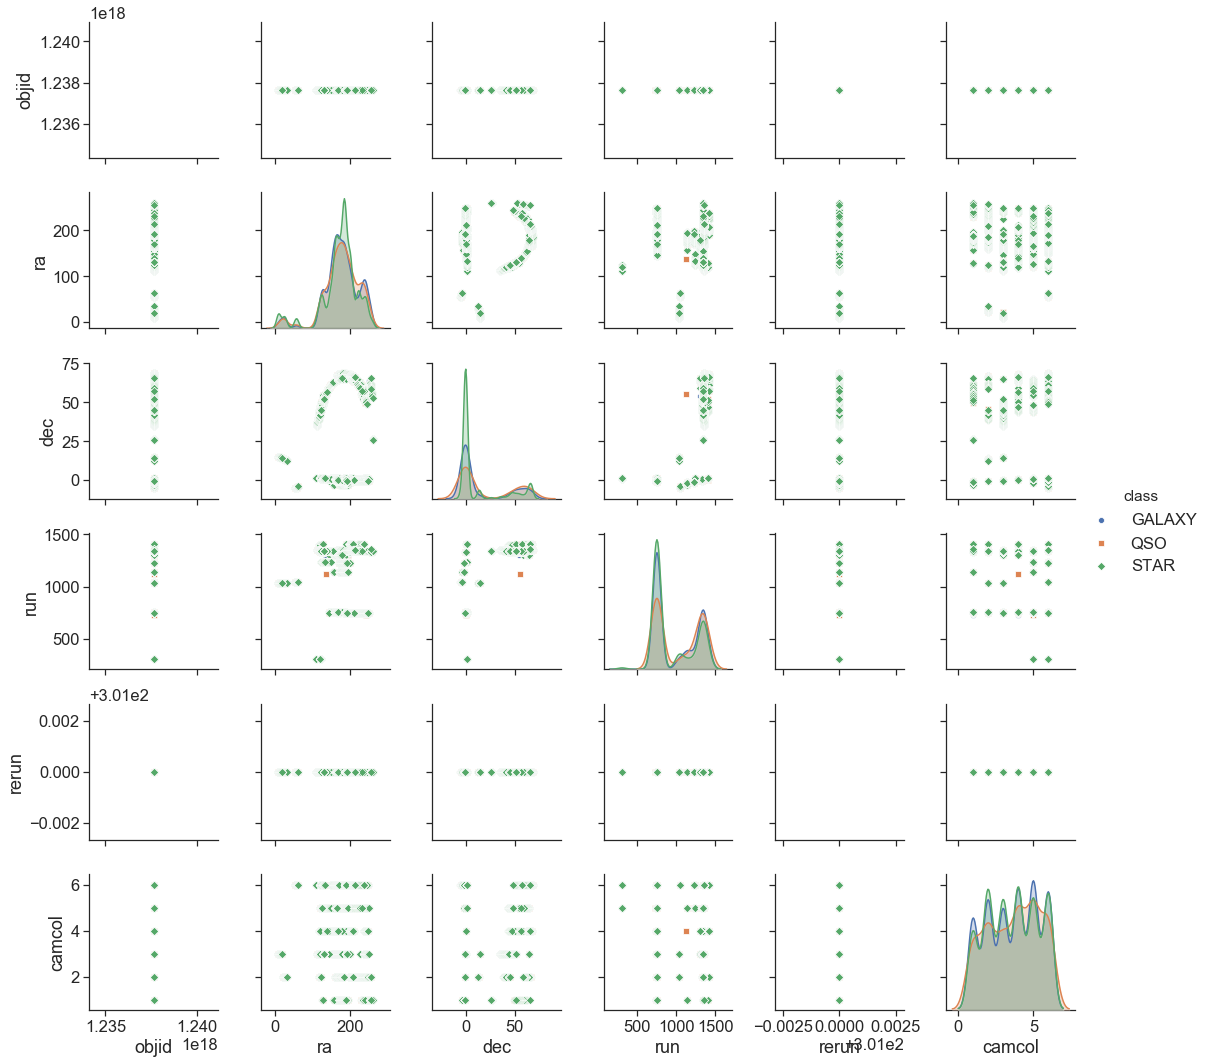

In [10]:
import matplotlib.pyplot as plt

sns.set(style='ticks', font_scale=1.5, rc={'figure.figsize':(18, 12)})
sns.pairplot(df, vars=('objid', 'ra', 'dec', 'run', 'rerun', 'camcol'), 
             diag_kind='kde', hue='class', markers=['o', 's', 'D']);

- The predictors **objid** and **rerun** are have constant values and do not contribute to classifying **class**.
- The predictors **ra**, **dec** and **run** have similar distributions but different frequencies for the different levels of **class**.
- The predictor **camcol** has a different distribution for *QSO* (fewer peaks) than it is does for *Galaxy* and *Star*, making it useful for classification.

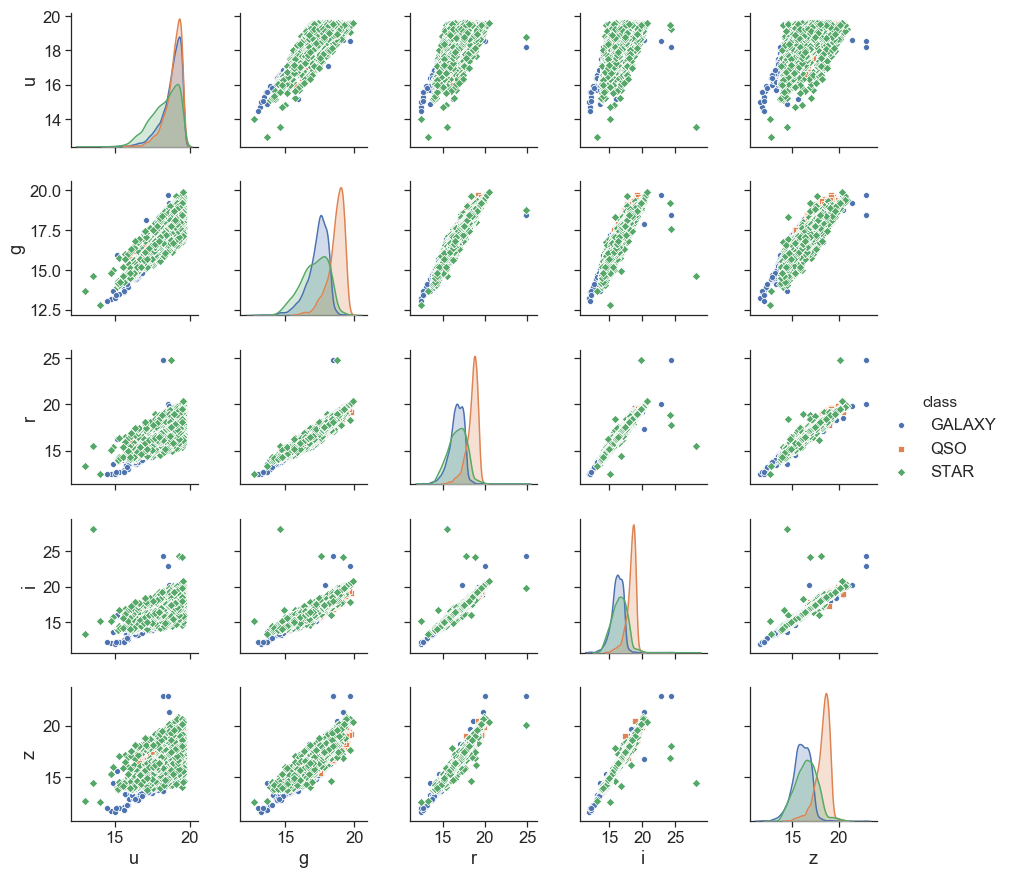

In [11]:
sns.pairplot(df, vars=('u', 'g', 'r', 'i', 'z'), 
            diag_kind='kde', hue='class', markers=['o', 's', 'D']);

- The predictors **u, g, r, i, & z** have different distributions for each level of **class** and positive linear relationships with one another.

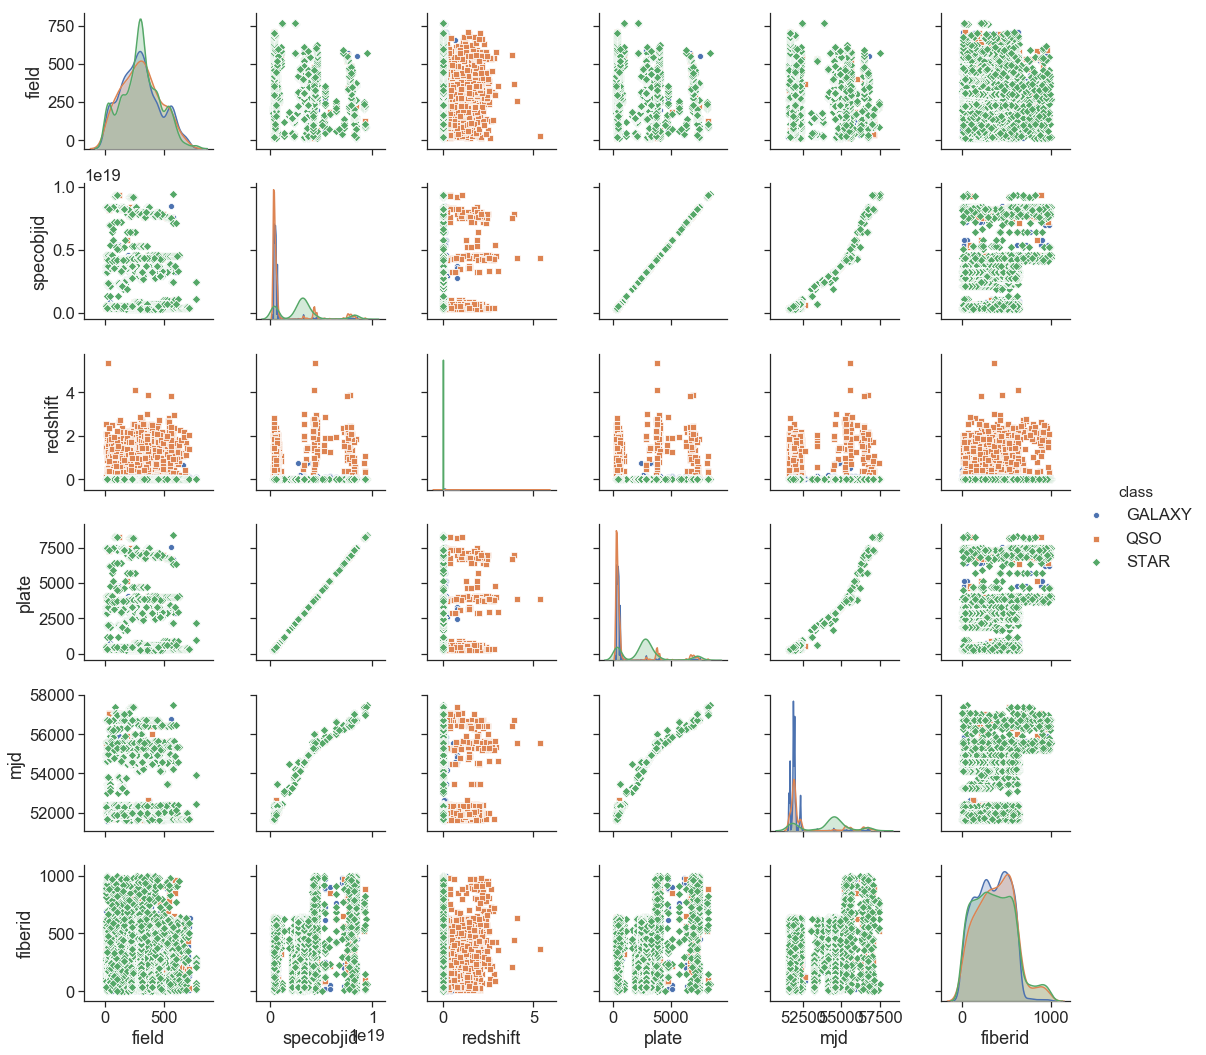

In [12]:
sns.pairplot(df, vars=('field', 'specobjid', 'redshift', 'plate', 'mjd', 'fiberid'), 
            diag_kind='kde', hue='class', markers=['o', 's', 'D']);

- The predictors **field** and **fiberid** have wide flat distributions.
- The predictors **specobjid**, **redshift**, **plate**, and **mjid** have narrow spiked distributions.
- The variable **redshift** is good at separating *QSO* from *Galaxy* and *Star* (values are higher).

Drop the **objid** and **rerun** columns because they have constant values that cannot contribute to classification.

In [13]:
df.drop(['objid', 'rerun'], axis=1, inplace=True)

View boxplots and kernel density estimates for the remaining predictors.

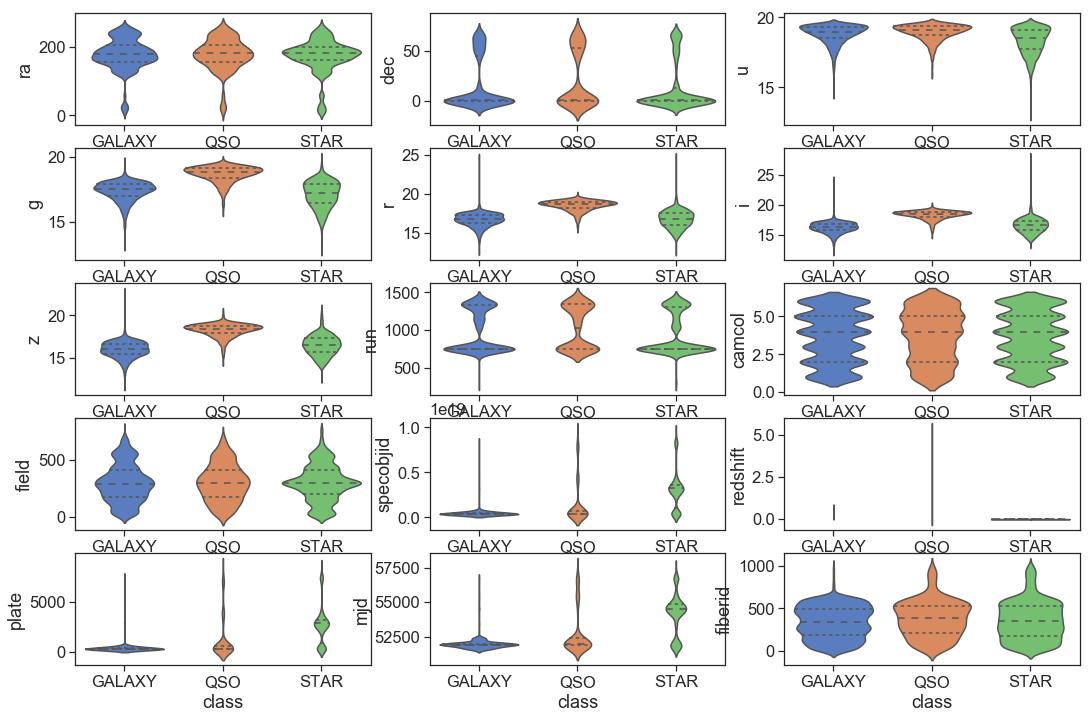

In [14]:
col_list = list(df.columns)
col_list.remove('class')

fig, ax = plt.subplots(5, 3)
for i in range(len(col_list)):
    sns.violinplot(data=df, y=col_list[i], x='class', palette='muted', inner='quartile', ax=ax[i//3, i%3]);    

- There is good separation of the *QSO* median in **g, r, i, z**, and **redshift**.
- There is good separation of the *Star* median in **specobjid**, **plate**, and **mjd**.
- There does not appear to be a predictor in which the *Galaxy* median achieves good separation from the other levels.
- Many of the predictors are multimodal with multiple dense concentrations of values.

[[table of contents]](#0.-Table-of-Contents)

## 5. Model the Material
Grid search optimizes hyperparameters by searching the space of provided values for the best cross-validation score.
In k-fold cross-validation a training set is split into k smaller sets. In a loop with k folds, a model is trained on k-1 of the folds; the resulting model is validated on the remaining data which acts as a validation set for computing a performance measure (e.g., accuracy). The performance measure reported by k-fold cross-validation is the average of the values computed in the loop over the k folds. Good practice advises holding out a test set from the cross-validation process to use for final evaluation.

For clustering algorithms, I'll use the entire dataset so as much information as possible can contribute to learning about the separation between classes.

For classification algorithms, I'll use 10-fold cross-validation to train and optimize hyperparameters. Final models will be evaluated on a testing set with 10% of the dataset.

Models will be evaluated by two performance metrics: accuracy and weighted F1 score. Accuracy is the ratio of the number of correct predictions over the total number of predictions. The F1 score is the weighted average of precision and recall: `F1 = 2(precision · recall) / (precision + recall)`. Precision is the ability of a classifier not to label a negative sample as positive. Recall is the ability of a classifier to find all positive samples. F1 scores range between 0 (worst) and 1 (best). 
The F1 score I will report is the average that is weighted by the number of true instances for each label. This method will take label imbalance into account. 

Split the dataset into a group of predictors and the target variable.

In [15]:
y = df['class']
x = df.drop('class', axis=1)

Split the groups into a training set (90% of the dataset) to construct models on and a testing set (10% of the dataset) on which to obtain unbiased performance metrics.

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

Scale the predictors so that the variance of the features are in the same range. If a feature has a variance that is orders of magnitude more than other features it will dominate the other features in models built from that dataset. Scaling and normalization prevent this unwanted behavior.

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_s = scaler.fit_transform(x)
x_s = pd.DataFrame(data=x_s, columns=x.columns)
print('Scaled Predictors:')
display(x_s.describe())

x_train_s = scaler.fit_transform(x_train)
x_train_s = pd.DataFrame(data=x_train_s, columns=x_train.columns)
print('\nTraining Set:')
display(x_train_s.describe())

x_test_s = scaler.transform(x_test)
x_test_s = pd.DataFrame(data=x_test_s, columns=x_test.columns)
print('\nTesting Set:')
display(x_test_s.describe())

Scaled Predictors:


,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.662163,0.273504,0.851678,0.642241,0.356444,0.285624,0.428813,0.609633,0.529740,0.384914,0.146734,0.027597,0.146732,0.231329,0.352422
std,0.189130,0.341052,0.125346,0.132800,0.086316,0.070341,0.107211,0.247559,0.333237,0.214766,0.219647,0.072560,0.219644,0.255997,0.206505
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.590288,0.065521,0.784922,0.564028,0.302474,0.240660,0.357124,0.402174,0.200000,0.228534,0.004291,0.000787,0.004298,0.054549,0.185936
50%,0.681417,0.078279,0.887035,0.659546,0.357883,0.283862,0.425883,0.405797,0.600000,0.380449,0.021494,0.008721,0.021488,0.070981,0.350350
75%,0.765140,0.555050,0.948469,0.731885,0.410743,0.327206,0.492846,0.926630,0.800000,0.532365,0.281563,0.018051,0.281557,0.489582,0.509510
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Training Set:


,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,0.661190,0.274165,0.851278,0.641592,0.355272,0.280014,0.420621,0.610392,0.532644,0.384230,0.147106,0.027351,0.147104,0.231489,0.351824
std,0.189810,0.341079,0.126231,0.133165,0.086210,0.070864,0.108482,0.247796,0.332606,0.215117,0.220655,0.072123,0.220652,0.256654,0.206529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.586906,0.065635,0.784922,0.563962,0.301491,0.234945,0.348132,0.402174,0.200000,0.228534,0.004291,0.000787,0.004298,0.054549,0.184184
50%,0.680378,0.078450,0.887086,0.659320,0.356381,0.278345,0.417265,0.405797,0.600000,0.380449,0.021497,0.008794,0.021488,0.070981,0.350350
75%,0.765127,0.565730,0.948416,0.730994,0.409484,0.321522,0.485314,0.926630,0.800000,0.532365,0.281565,0.018097,0.281557,0.489582,0.509510
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Testing Set:


,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.670912,0.267557,0.855276,0.648082,0.360392,0.283703,0.426727,0.602803,0.503600,0.391075,0.143391,0.029809,0.143389,0.229885,0.357799
std,0.182753,0.340921,0.117081,0.129387,0.088048,0.070743,0.109892,0.245434,0.337907,0.211587,0.210434,0.076377,0.210431,0.250127,0.206306
min,0.002243,0.001259,0.304500,0.063290,-0.001025,-0.007337,-0.013273,0.395833,0.000000,0.000000,0.000003,0.000388,0.000000,0.005082,0.000000
25%,0.605870,0.064250,0.784902,0.565337,0.305074,0.236961,0.353282,0.402174,0.200000,0.246697,0.004301,0.000789,0.004298,0.054549,0.200200
50%,0.690112,0.076584,0.886486,0.662945,0.362174,0.282342,0.423578,0.405797,0.600000,0.384412,0.021186,0.008130,0.021181,0.070981,0.355355
75%,0.765307,0.270356,0.948526,0.737414,0.415578,0.327479,0.493384,0.926630,0.800000,0.529723,0.281552,0.017644,0.281557,0.446383,0.513764
max,0.999200,0.999861,0.999412,0.955973,0.999999,0.493335,0.761641,1.000000,1.000000,0.997358,0.983546,0.488536,0.983546,0.986448,0.998999


### 5.1. K-Means Clustering
The KMeans algorithm clusters data by trying to separate samples into groups of equal variance by minimizing the within-cluster sum-of-squares (inertia). The algorithm divides a set of samples into disjoint clusters that are described by the mean (centroid) of the samples in them. This algorithm scales well to large number of samples but responds poorly to elongated and irregular-shaped clusters.

K-means works in three steps:
1. The first step chooses the initial centroids. After initialization, the other two steps are looped until a condition is reached. 
2. The second step assigns each sample to its nearest centroid. 
3. The third step creates new centroids by taking the mean of all samples assigned to the centroid. The difference between the old and new centroids is computed and the algorithm repeats until this difference is less than a set threshold. 

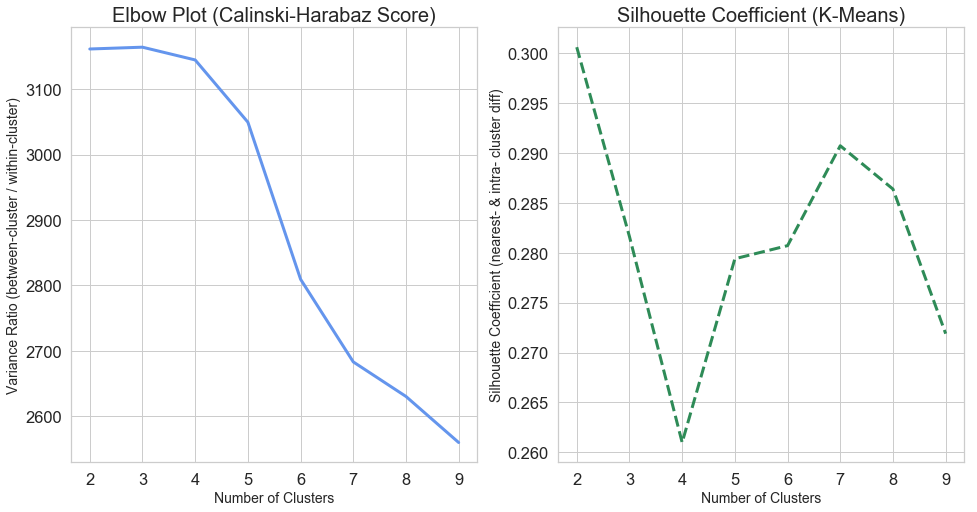

In [18]:
# k-means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabaz_score, silhouette_score
sns.set_style('whitegrid')

clusters, ch_scores, s_scores = [], [], []
for n in range(2, 10):
    clusters.append(n)
    model_kmeans = KMeans(n_clusters=n, init='k-means++', random_state=42, n_jobs=-1)
    model_kmeans.fit(x_s)
    ch_scores.append(calinski_harabaz_score(x_s, model_kmeans.labels_))
    s_scores.append(silhouette_score(x_s, model_kmeans.labels_))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.plot(clusters, ch_scores, color='cornflowerblue', lw=3)
ax1.set_title('Elbow Plot (Calinski-Harabaz Score)', fontsize=20)
ax1.set_ylabel('Variance Ratio (between-cluster / within-cluster)', fontsize=14)
ax1.set_xlabel('Number of Clusters', fontsize=14)
ax2.plot(clusters, s_scores, color='seagreen', ls='--', lw=3)
ax2.set_title('Silhouette Coefficient (K-Means)', fontsize=20)
ax2.set_ylabel('Silhouette Coefficient (nearest- & intra- cluster diff)', fontsize=14)
ax2.set_xlabel('Number of Clusters', fontsize=14)
plt.show();

- The elbow method is used to find the most appropriate number of clusters in a dataset. Its results can be questionable, however, and should be supplemented with additional methods.
- The elbow method plots the percentage of variance explained by the clusters against the number of clusters. In this plot, the initial clusters will explain a lot of the variation. As the number of clusters increases, there will be a point at which the information gain drops and an angle is made in the curve. The optimal number of clusters is at this bend. For some datasets the elbow can be difficult to identify.
- The metric used to track variation by clusters is the Calinski and Harabasz score (Variance Ratio Criterion). This is the ratio of between-cluster dispersion and within-cluster dispersion. The score is higher for dense, well-separated clusters.
- The Silhouette Coefficient is used to supplement the elbow method. It is calculated using the mean intra-cluster distance `a` and the mean nearest-cluster distance `b` for each sample: `(b - a) / MAX(a, b)`. When interpreting, the best value is 1; the worst value is -1; and values near 0 indicate cluster overlap.
- We know that ideally this dataset should have 3 clusters. The fact that the maximum Variance Ratio is at 3 clusters is consistent with our expecations. There is no real elbow in the plot, however. The supplementing Silhouette Coefficient reveals that the best cluster separation happens with 2 clusters.

### 5.2. DBSCAN Clustering
The density-based spatial clustering of applications with noise (DBSCAN) algorithm treats clusters as regions of high density separated by regions of low density. Clusters found by DBSCAN can be any shape; this is an advanatage over k-means clustering where clusters must be convex-shaped.

DBSCAN works by assigning core and neighbor samples. Core samples are samples that are in regions of high density where there are `min_samples` other samples within a distance of `eps` (neighbors).
A cluster is a set of core samples that is built by recursively taking a core sample and finding core samples that are close by. Neighbors are non-core samples in the cluster that are too distant to be core samples. Beyond these samples (bounded by `eps`) samples are considered to be outliers.

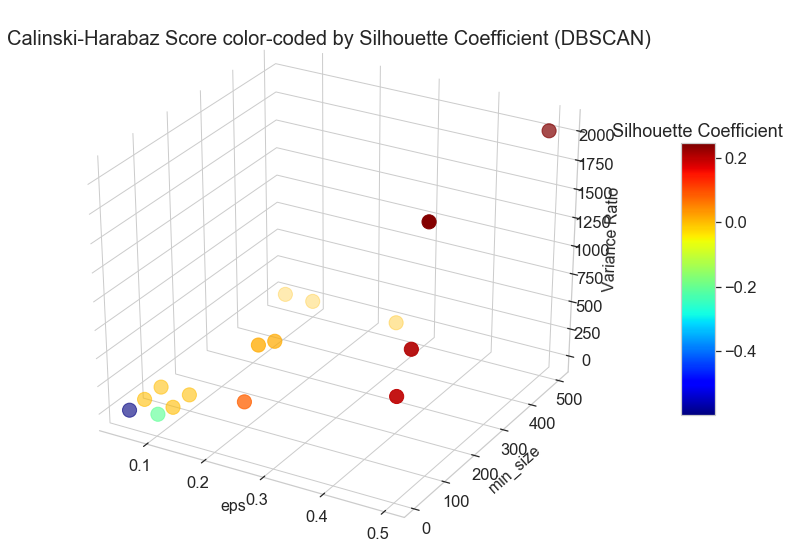

In [19]:
# dbscan
from sklearn.cluster import DBSCAN
from mpl_toolkits import mplot3d

eps_dist = [0.05, 0.1, 0.25, 0.5]
min_samples = [5, 50, 100, 500]
params = []
for e in eps_dist:
    for m in min_samples:
        params.append((e, m))
        
eps_plot, min_plot, ch_plot, s_plot = [], [], [], []
for param in params:
    model_dbscan = DBSCAN(eps=param[0], min_samples=param[1], n_jobs=-1)
    labels = model_dbscan.fit_predict(x_s)
    eps_plot.append(param[0])
    min_plot.append(param[1])
    try:
        ch_plot.append(calinski_harabaz_score(x_s, labels))
    except Exception:
        ch_plot.append(0)
    try:
        s_plot.append(silhouette_score(x_s, labels))
    except Exception:
        s_plot.append(0)      

fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection='3d')
p = ax.scatter3D(eps_plot, min_plot, ch_plot, c=s_plot, cmap='jet', s=200)
ax.set_title('Calinski-Harabaz Score color-coded by Silhouette Coefficient (DBSCAN)', fontsize=20)
ax.set_xlabel('eps', fontsize=16)
ax.set_ylabel('min_size', fontsize=16)
ax.set_zlabel('Variance Ratio', fontsize=16)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.colorbar(p, shrink=0.5, aspect=8).ax.set_title('Silhouette Coefficient');

- The parameter `min_samples` controls the tolerance of the algorithm toward noise.
- The parameter `eps` controls the local neighborhood of points. When its value is too small, most data will not be clustered. When it is too big, close clusters are merged.
- For the plot, as `eps`distance increases, the variance ratio and silhouette coefficient also increase.
- The variance ratio and silhouette coefficient do not appear to be as directly affected by `min_size`.
- The best metrics are received with `eps` = 0.50 and `min_samples` = 100. 
- This plot indicates that observations are relatively sparse in this feature space since performance improves with distance.

### 5.3. KNN Classification
Neighbors-based classification is computed from a simple majority vote of the nearest neighbors for each sample. That point is then assigned the data class having the most representatives within the set of nearest neighbors. K-nearest neighbors (KNN) uses a provided integer k as the number of neighbors to use when classifying each point. The optimal choice of k is highly dependent on the dataset. In general, larger k suppresses noise but makes class boundaries less distinct.

K-Nearest Neighbors
------------------------------------------------------------------------------------------
Best Model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='distance')
Best Hyperparameters: {'n_neighbors': 5, 'weights': 'distance'}

Validation Accuracy: 0.887
Test Accuracy: 0.876
Test F1 Score: 0.875

Test Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.85      0.94      0.89       478
         QSO       0.90      0.74      0.81        94
        STAR       0.90      0.84      0.87       428

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.88      0.84      0.86      1000
weighted avg       0.88      0.88      0.87      1000



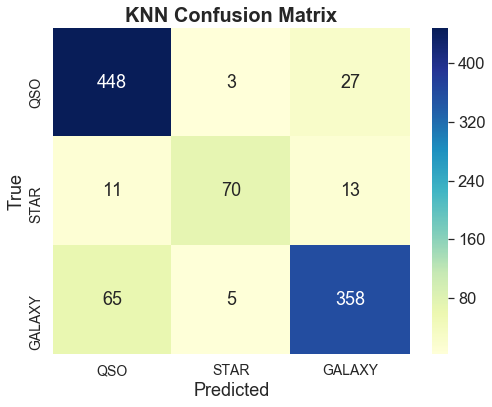

In [20]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_jobs=-1)
k_vals = list(range(5, 100, 5))
weights = ['uniform', 'distance']
params = dict(n_neighbors=k_vals, weights=weights)
model_knn = GridSearchCV(knn, params, cv=10, scoring='accuracy')
model_knn.fit(x_train_s, y_train)
pred_knn = model_knn.predict(x_test_s)

val_acc_knn = model_knn.best_score_
test_acc_knn = accuracy_score(y_test, pred_knn)
test_f1_knn = f1_score(y_test, pred_knn, average='weighted')

print('K-Nearest Neighbors')
print('-'*90)
print('Best Model:', model_knn.best_estimator_)
print('Best Hyperparameters:', model_knn.best_params_)
print('\nValidation Accuracy:', round(val_acc_knn, 3))
print('Test Accuracy:', round(test_acc_knn, 3))
print('Test F1 Score:', round(test_f1_knn, 3))
print('\nTest Classification Report:\n', classification_report(y_test, pred_knn))

plt.figure(figsize=(8, 6)) 
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_knn), annot=True, fmt='d', cmap='YlGnBu', ax=ax);
plt.title('KNN Confusion Matrix', fontsize=20, fontweight='bold')
plt.ylabel('True', fontsize=18)
plt.xlabel('Predicted', fontsize=18)
ax.xaxis.set_ticklabels(set(y_test), fontsize=14) 
ax.yaxis.set_ticklabels(set(y_test), fontsize=14);

- The hyperparameter search grid is setup for two parameters: number of nearest neighbors`n_neighbors` and neighbor weight assignments `weights`. `n_neighbors` searches through 5 to 100 in intervals of 5 points. `weights` is looked at for *uniform* and *distance* methods. The *distance* method allows close neighbors contribute more to the fit than far samples.  
- The best model is found to use `n_neighbors` = 5 and `weights` = distance.
- The 10-fold cross-validation accurcy is 88.7%.
- The 10% testing set accuracy is 87.6%. The small gap between values indicates overfit is not an issue.
- The weighted testing set F1 score is 87.5%. The small value gap indicates the unbalanced class levels were not an issue.
- The test set classification report indicates that *Galaxy* has a slightly higher misclassification rate (precision) but is better at finding its points (recall). By comparison, *QSO* is worst at finding its positive samples.
- The test set confusion matrix reveals that the largest misclassification is from *Star* to *Galaxy* (65).

### 5.4. Logistic Regression Classification
Logistic regression is a supervised linear model for classification where the probabilities describing the possible outcomes of a trial are modeled using a logistic function. The regularization hyperparameter determines which cost function is minimized (penalty). The solver hyperparameter selects which optimization algorithm is applied toward the solution. For multi-class situations, this classifier uses a one-vs-rest method to separate binary classifiers that are trained on each class.

Logistic Regression
------------------------------------------------------------------------------------------
Best Model: LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l1', random_state=42, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)
Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'tol': 0.0001}

Validation Accuracy: 0.942
Test Accuracy: 0.933
Test F1 Score: 0.933

Test Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.92      0.95      0.93       478
         QSO       0.99      0.90      0.94        94
        STAR       0.94      0.93      0.93       428

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.95      0.93      0.94      1000
weighted avg       0.93      0.93      0.93      1000



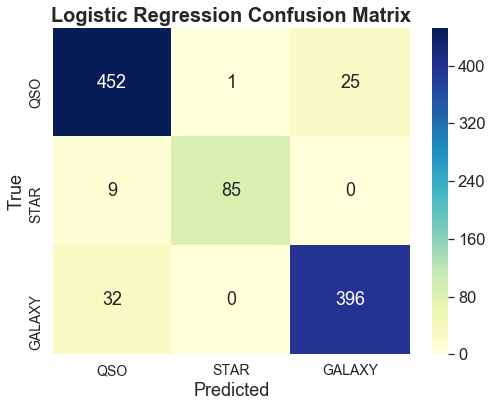

In [22]:
# logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='saga', random_state=42, n_jobs=-1)
params = {
    'penalty': ['l1'],
    'C': [0.1, 0.3, 0.7, 1],
    'tol': [1e-2, 1e-4, 1e-8, 1e-12]    
    }
model_lr = GridSearchCV(lr, params, cv=10, scoring='accuracy')
model_lr.fit(x_train_s, y_train)
pred_lr = model_lr.predict(x_test_s)

val_acc_lr = model_lr.best_score_
test_acc_lr = accuracy_score(y_test, pred_lr)
test_f1_lr = f1_score(y_test, pred_lr, average='weighted')

print('Logistic Regression')
print('-'*90)
print('Best Model:', model_lr.best_estimator_)
print('Best Hyperparameters:', model_lr.best_params_)
print('\nValidation Accuracy:', round(val_acc_lr, 3))
print('Test Accuracy:', round(test_acc_lr, 3))
print('Test F1 Score:', round(test_f1_lr, 3))
print('\nTest Classification Report:\n', classification_report(y_test, pred_lr))

plt.figure(figsize=(8, 6)) 
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_lr), annot=True, fmt='d', cmap='YlGnBu', ax=ax);
plt.title('Logistic Regression Confusion Matrix', fontsize=20, fontweight='bold')
plt.ylabel('True', fontsize=18)
plt.xlabel('Predicted', fontsize=18)
ax.xaxis.set_ticklabels(set(y_test), fontsize=14) 
ax.yaxis.set_ticklabels(set(y_test), fontsize=14);
plt.show();

- The hyperparameter search grid is setup for three parameters: the norm used in regularization `penalty`, the inverse of regularization strength `C`, and the stopping criteria tolerance `tol`. `penalty` searches through *l1* and *l2* regularizations. `C` looks at values of 0.1, 0.3, 0.7, and 1.0. `tol` checks values of 1e-2, 1e-4, 1e-8, and 1e-12. `solver` is set to the optimization algorithm *saga* to allow for a grid search of these hyperparameters to take place.
- The best model is found to use `C` = 1.0, `penalty` = 'l1', and `tol` = 0.0001. 
- The 10-fold cross-validation accurcy is 94.2%.
- The 10% testing set accuracy is 93.3%. The small gap between values indicates overfit is not an issue.
- The weighted testing set F1 score is 93.3%. The zero gap indicates the unbalanced class levels were not an issue.
- The test set classification report indicates that the misclassification rate (precision) and positive point finding ability (recall) of the class levels are roughly equal. 
- The test set confusion matrix reveals that the largest misclassification is from *Star* to *Galaxy* (32).

### 5.5. SVM Classification
Support vector machine (SVM) is a supervised learning method that can be used to classify observations with a separating hyperplane. This model reprsents samples as points in space where the separate categories are divided by a gap that is as wide as possible. New examples can be mapped into the same space. The class prediction for these new points is the category of the side of the separating hyperplane in which they are placed. Support vector machine models are effective with high-dimensional problems and can use kernel functions for added non-linear flexibility. In multi-class situations, this model implements a one-against-one approach where `(number_of_classes - 1) / 2` classifiers are constructed, with each one trained on data from two classes.

Support Vector Machine
------------------------------------------------------------------------------------------
Best Model: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.1, verbose=False)
Best Hyperparameters: {'C': 1.0, 'kernel': 'linear', 'tol': 0.1}

Validation Accuracy: 0.906
Test Accuracy: 0.902
Test F1 Score: 0.902

Test Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.85      0.97      0.91       478
         QSO       1.00      0.87      0.93        94
        STAR       0.95      0.83      0.89       428

   micro avg       0.90      0.90      0.90      1000
   macro avg       0.94      0.89      0.91      1000
weighted avg       0.91      0.90      0.90      1000



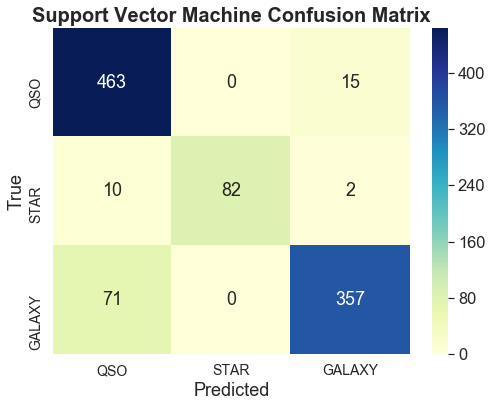

In [23]:
# support vector machine
from sklearn.svm import SVC

svm = SVC(random_state=42)
params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 0.3, 0.7, 1.0],    
    'tol': [1e-1, 1e-3, 1e-5, 1e-10]
    }
model_svm = GridSearchCV(svm, params, cv=10, scoring='accuracy')
model_svm.fit(x_train_s, y_train)
pred_svm = model_svm.predict(x_test_s)

val_acc_svm = model_svm.best_score_
test_acc_svm = accuracy_score(y_test, pred_svm)
test_f1_svm = f1_score(y_test, pred_svm, average='weighted')

print('Support Vector Machine')
print('-'*90)
print('Best Model:', model_svm.best_estimator_)
print('Best Hyperparameters:', model_svm.best_params_)
print('\nValidation Accuracy:', round(val_acc_svm, 3))
print('Test Accuracy:', round(test_acc_svm, 3))
print('Test F1 Score:', round(test_f1_svm, 3))
print('\nTest Classification Report:\n', classification_report(y_test, pred_svm))

plt.figure(figsize=(8, 6)) 
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_svm), annot=True, fmt='d', cmap='YlGnBu', ax=ax);
plt.title('Support Vector Machine Confusion Matrix', fontsize=20, fontweight='bold')
plt.ylabel('True', fontsize=18)
plt.xlabel('Predicted', fontsize=18)
ax.xaxis.set_ticklabels(set(y_test), fontsize=14) 
ax.yaxis.set_ticklabels(set(y_test), fontsize=14);
plt.show();

- The hyperparameter search grid is setup for three parameters: the kernel type used in the algorithm `kernel`, the regularization parameter `C`, and the stopping criterion tolerance `tol`. `kernel` searches through *linear*, *poly* (polynomial), *rbf* (radial basis function), and *sigmoid* options. `C` looks at values of 0.1, 0.3, 0.7, and 1.0. The strength of regularization is inversely proportional to `C`. `tol` checks values of 1e-1, 1e-3, 1e-5, and 1e-10. 
- The best model is found to use `C` = 1.0, `kernel` = 'linear', and `tol` = 0.1.
- The 10-fold cross-validation accurcy is 90.6%.
- The 10% testing set accuracy is 90.2%. The small gap between values indicates overfit is not an issue.
- The weighted testing set F1 score is 90.2%. The zero gap indicates the unbalanced class levels were not an issue.
- The test set classification report indicates that *Galaxy* has a slightly higher misclassification rate (precision) but is better at finding its points (recall). By comparison, *Star* is the worst at finding its positive points.
- The test set confusion matrix reveals that the largest misclassification is from *Star* to *Galaxy* (71).

### 5.6. Naive Bayes Classification
Naive Bayes methods are supervised learning algorithms based on the application of Bayes’ theorem with the naive assumption that conditional independence exists between every pair of features given the class variable. Naive Bayes classifiers work well but can be poor estimators due to their simplified approach. Models using this algorithm are known to be very fast compared to models using more complex methods. Additionally, the multinomial Naive Bayes classifier requires a small amount of training data to estimate model parameters.

Naive Bayes
------------------------------------------------------------------------------------------
Best Model: MultinomialNB(alpha=0, class_prior=None, fit_prior=False)
Best Hyperparameters: {'alpha': 0, 'fit_prior': False}

Validation Accuracy: 0.858
Test Accuracy: 0.851
Test F1 Score: 0.848

Test Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.79      0.98      0.87       478
         QSO       0.99      0.72      0.83        94
        STAR       0.94      0.74      0.83       428

   micro avg       0.85      0.85      0.85      1000
   macro avg       0.90      0.81      0.84      1000
weighted avg       0.87      0.85      0.85      1000



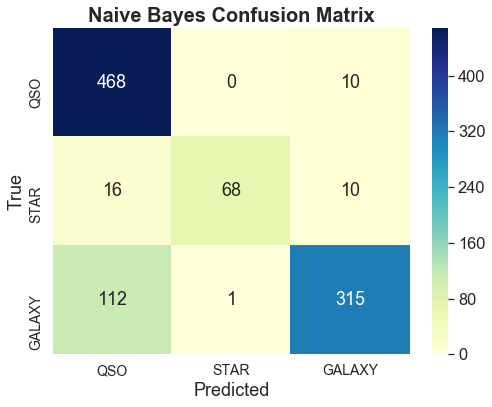

In [24]:
# naive bayes
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
params = {
    'alpha': [0, 0.25, 0.5, 0.75, 1],
    'fit_prior': [False, True]
}
model_nb = GridSearchCV(nb, params, cv=10, scoring='accuracy')
model_nb.fit(x_train_s, y_train)
pred_nb = model_nb.predict(x_test_s)

val_acc_nb = model_nb.best_score_
test_acc_nb = accuracy_score(y_test, pred_nb)
test_f1_nb = f1_score(y_test, pred_nb, average='weighted')

print('Naive Bayes')
print('-'*90)
print('Best Model:', model_nb.best_estimator_)
print('Best Hyperparameters:', model_nb.best_params_)
print('\nValidation Accuracy:', round(val_acc_nb, 3))
print('Test Accuracy:', round(test_acc_nb, 3))
print('Test F1 Score:', round(test_f1_nb, 3))
print('\nTest Classification Report:\n', classification_report(y_test, pred_nb))

plt.figure(figsize=(8, 6)) 
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_nb), annot=True, fmt='d', cmap='YlGnBu', ax=ax);
plt.title('Naive Bayes Confusion Matrix', fontsize=20, fontweight='bold')
plt.ylabel('True', fontsize=18)
plt.xlabel('Predicted', fontsize=18)
ax.xaxis.set_ticklabels(set(y_test), fontsize=14) 
ax.yaxis.set_ticklabels(set(y_test), fontsize=14);
plt.show();

- The hyperparameter search grid is setup for two parameters: the additive smoothing parameter `alpha` and whether to learn class prior probabilities use a uniform prior `fit_prior`. `alpha` searches through no smoothing (0), Lidstone smoothing (0.25, 0.5, 0.75) and Laplace smoothing (1). `fit_prior` looks at both options available.
- The best model is found to use `alpha` = 0 and `fit_prior` = False.
- The 10-fold cross-validation accurcy is 85.8%.
- The 10% testing set accuracy is 85.1%. The small gap between values indicates overfit is not an issue.
- The weighted testing set F1 score is 84.8%. The small gap indicates the unbalanced class levels were not an issue.
- The test set classification report indicates that *Galaxy* has a higher misclassification rate (precision) but is better at finding its points (recall). By comparison, *Star* and *QSO* are both bad at finding their positive points.
- The test set confusion matrix reveals that the largest misclassification is from *Star* to *Galaxy* (112).

### 5.7. Decision Tree Classification
Decision trees are a non-parametric supervised learning method that predict the value of a target variable by learning simple decision rules from data features. Generally speaking, as the size of the tree increases (depth), the complexity of the decision rules and the fit quality also increase. Decision trees are simple to visualize and interpret but can become overly complex and fail to generalize to new data (overfitting). Additionally, small variations in the data can result in completely different tree models (instability).

The relative rank (depth) of a feature used as a decision node in a tree can be used to assess that feature's relative importance when making predictions. Features at the top of the tree contribute to the final prediction decision for a larger fraction of the input samples. The expected fraction of samples that a feature contributes to is used to provide an estimate of its relative importance.

Decision Tree
------------------------------------------------------------------------------------------
Best Model: DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 20}

Validation Accuracy: 0.989
Test Accuracy: 0.984
Test F1 Score: 0.984

Test Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98       478
         QSO       0.95      0.89      0.92        94
        STAR       1.00      1.00      1.00       428

   micro avg       0.98      0.98      0.98      1000
   macro avg       0.98      0.96      0.97      10

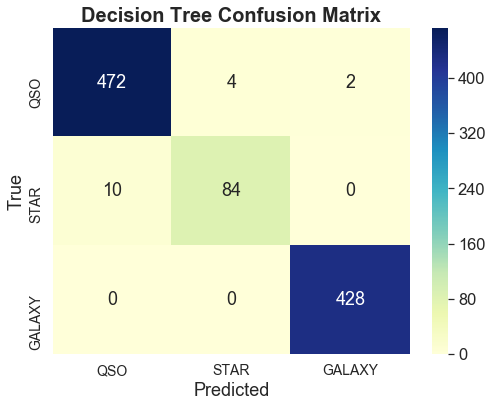

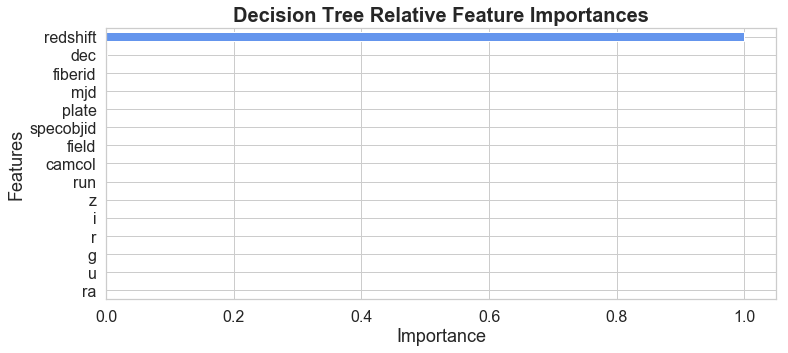

In [25]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [1, 3, 5, 10],
    'min_samples_split': [2, 20, 100, 200]
    }
model_dt = GridSearchCV(dt, params, cv=10, scoring='accuracy')
model_dt.fit(x_train_s, y_train)
pred_dt = model_dt.predict(x_test_s)

val_acc_dt = model_dt.best_score_
test_acc_dt = accuracy_score(y_test, pred_dt)
test_f1_dt = f1_score(y_test, pred_dt, average='weighted')

print('Decision Tree')
print('-'*90)
print('Best Model:', model_dt.best_estimator_)
print('Best Hyperparameters:', model_dt.best_params_)
print('\nValidation Accuracy:', round(val_acc_dt, 3))
print('Test Accuracy:', round(test_acc_dt, 3))
print('Test F1 Score:', round(test_f1_dt, 3))
print('\nTest Classification Report:\n', classification_report(y_test, pred_dt))

plt.figure(figsize=(8, 6)) 
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_dt), annot=True, fmt='d', cmap='YlGnBu', ax=ax);
plt.title('Decision Tree Confusion Matrix', fontsize=20, fontweight='bold')
plt.ylabel('True', fontsize=18)
plt.xlabel('Predicted', fontsize=18)
ax.xaxis.set_ticklabels(set(y_test), fontsize=14) 
ax.yaxis.set_ticklabels(set(y_test), fontsize=14);
plt.show();

feat_imp = pd.Series(model_dt.best_estimator_.feature_importances_, index=x.columns)
feat_imp.sort_values().plot(kind='barh', figsize=(12, 5), color='cornflowerblue')
plt.ylabel('Features', fontsize=18);
plt.xlabel('Importance',fontsize=18);
plt.title('Decision Tree Relative Feature Importances', fontsize=20, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show();

- The hyperparameter search grid is setup for four parameters: the function measuring the split quality `criterion`, the maximum tree depth `max_depth`, the minimum samples in a leaf node `min_samples_leaf`, and the minimum samples to split an internal node `min_samples_split`. `crtierion` searches through *Gini impurity* and *entropy information gain* classification critiera measures. `max_depth` looks at values of 3, 5, 7, and 10. `min_samples_leaf` checks values of 1, 3, 5, and 10. `min_samples_split` considers values of 2, 20, 100, and 200.  
- The best model is found to use `criterion` = 'entropy', `max_depth` = 3, `min_samples_leaf` = 1, and `min_samples_split` = 20.
- The 10-fold cross-validation accurcy is 98.9%.
- The 10% testing set accuracy is 98.4%. The small gap between values indicates overfit is not an issue.
- The weighted testing set F1 score is 98.4%. The zero gap indicates the unbalanced class levels were not an issue.
- The test set classification report indicates that *QSO* has a slightly higher misclassification rate (precision) and is worse at finding its points (recall).
- The test set confusion matrix reveals that the largest misclassification is from *QSO* to *Galaxy* (10).
- The relative feature importances for best decision tree model reveal that the **redshift** predictor is capable of achieving these results practically by itself (99.9%).

### 5.8. Random Forest Classification
Random forest is an ensemble algorithm that fits a number of decision tree classifiers on sub-samples of the dataset and averages them to improve predictive accuracy and to control overfitting. The sub-sample size is equal to the input sample size but its samples are drawn with replacement (bootstrapping). A diverse set of classifiers is created by introducing randomness during their construction. The injected randomness decouples prediction errors and decreases the high variance inherent to individual decision trees. The prediction of the entire ensemble is the average of the individual classifier predictions. The average of the decoupled errors causes some of them to cancel. On the other hand, the variance reduction resulting from combining diverse trees can lead to a small increase in the model bias. During the construction of a tree the best split for each node is found from a random subset of the features (`max_features`). As it decreases, the variance reduction and bias increase. Likewise, the parameter `n_estimators` sets the number of trees in the forest. As it increases, the fit quality (up to a point) and computation time also increase. 
 
The relative rank (depth) of a feature used as a decision node in a tree can be used to assess that feature's relative importance when making predictions. Features at the top of the tree contribute to the final prediction decision for a larger fraction of the input samples. The expected fraction of samples that a feature contributes to is used to provide an estimate of its relative importance. Random forests reduce the variance of feature predictive contributions by averaging the individual estimates.

Random Forest
------------------------------------------------------------------------------------------
Best Model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
Best Hyperparameters: {'criterion': 'entropy', 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Validation Accuracy: 0.991
Test Accuracy: 0.987
Test F1 Score: 0.987

Test Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99       478
         QSO       0.95      0.93      0.94        94
        STAR       1.00      1.00      1.00       428

   micro avg      

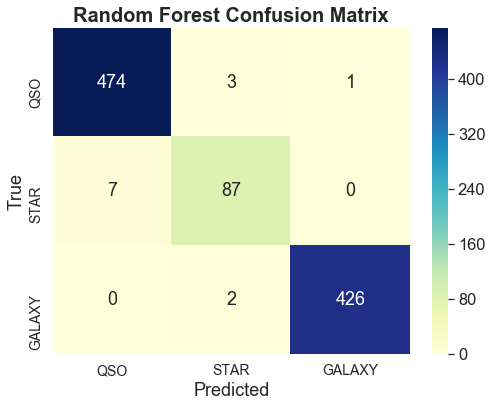

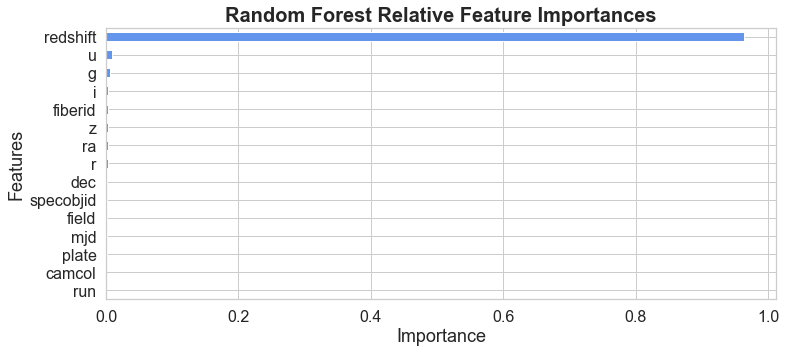

In [26]:
# random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 10, 20, 100],
    'min_samples_leaf': [1, 3, 5, 10]
    }
model_rf = GridSearchCV(rf, params, cv=10, scoring='accuracy')
model_rf.fit(x_train_s, y_train)
pred_rf = model_rf.predict(x_test_s)

val_acc_rf = model_rf.best_score_
test_acc_rf = accuracy_score(y_test, pred_rf)
test_f1_rf = f1_score(y_test, pred_rf, average='weighted')

print('Random Forest')
print('-'*90)
print('Best Model:', model_rf.best_estimator_)
print('Best Hyperparameters:', model_rf.best_params_)
print('\nValidation Accuracy:', round(val_acc_rf, 3))
print('Test Accuracy:', round(test_acc_rf, 3))
print('Test F1 Score:', round(test_f1_rf, 3))
print('\nTest Classification Report:\n', classification_report(y_test, pred_rf))

plt.figure(figsize=(8, 6)) 
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_rf), annot=True, fmt='d', cmap='YlGnBu', ax=ax);
plt.title('Random Forest Confusion Matrix', fontsize=20, fontweight='bold')
plt.ylabel('True', fontsize=18)
plt.xlabel('Predicted', fontsize=18)
ax.xaxis.set_ticklabels(set(y_test), fontsize=14) 
ax.yaxis.set_ticklabels(set(y_test), fontsize=14);
plt.show();

feat_imp = pd.Series(model_rf.best_estimator_.feature_importances_, index=x.columns)
feat_imp.sort_values().plot(kind='barh', figsize=(12, 5), color='cornflowerblue')
plt.ylabel('Features', fontsize=18);
plt.xlabel('Importance',fontsize=18);
plt.title('Random Forest Relative Feature Importances', fontsize=20, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show();

- The hyperparameter search grid is setup for five parameters: the number of trees in the forest `n_estimators`, the function measuring the split quality `criterion`, the number of features to consider when looking for the best split `max_features`, the minimal number of samples to split an internal node `min_samples_split`, and the minimum number of samples required for a leaf node `min_samples_leaf`. `n_estimators` searches through 10, 50, 100, and 200. `criterion` looks at *gini* (Gini impurity) and *entropy* (information gain) functions. `max_features` checks *sqrt* ( sqrt(n_features) ), *log2* ( log2(n_features) ) and None ( n_features ). `min_samples_split` assesses  2, 10, 20, and 100. `min_samples_leaf` considers 1, 3, 5, and 10. 
- The best model is found to use `criterion` = 'entropy', `max_features` = None, `min_samples_leaf` = 1, `min_samples_split` = 2, and `n_estimators` = 100.
- The 10-fold cross-validation accurcy is 99.1%.
- The 10% testing set accuracy is 98.7%. The small gap between values indicates overfit is not an issue.
- The weighted testing set F1 score is 98.7%. The zero gap indicates the unbalanced class levels were not an issue.
- The test set classification report indicates that misclassification rate (precision) and positive point finding (recall) is roughly equal across class levels.
- The test set confusion matrix reveals that the largest misclassification is from *QSO* to *Galaxy* (7).
- The relative feature importances for best random forest model reveal that the **redshift** predictor is capable of achieving these results practically by itself (96.3%). For this model, all of the other predictors are below one percent.

### 5.9. AdaBoost Classification
AdaBoost is an ensemble algorithm that works by fitting a sequence of weak learners (models only slightly better than random guessing) on repeatedly modified versions of the data. In each boosting iteration weights `w<sub>1</sub>, w<sub>2</sub>, ..., w<sub>N</sub>` are applied to each training sample. Initially, these weights are set to `w<sub>i</sub> = 1 / N` and the first boosting iteration trains a weak learner on the original data. For each successive boosting iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. In a given iteration, training samples that were incorrectly predicted in the previous iteration increase their weights; conversely, training samples that were correctly predicted in the previous iteration decrease their weights. Over time, samples that are difficult to predict influence subsequent weak learners forced to focus on the samples that were missed. The predictions from the weak learners are combined through a weighted majority vote to produce the final prediction. The number of weak learners is controlled by the parameter `n_estimators` and the contribution of learners to the final combination is set by the parameter `learning_rate`. 

Individual decision trees perform feature selection as a byproduct of selecting the appropriate split points. This information can be used to measure the importance of each feature since feature use in split points is correlated with feature importance. The feature importance of an ensemble is the average of the weak learner feature importances.

AdaBoost
------------------------------------------------------------------------------------------
Best Model: AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.75,
          n_estimators=25, random_state=42)
Best Hyperparameters: {'algorithm': 'SAMME', 'learning_rate': 0.75, 'n_estimators': 25}

Validation Accuracy: 0.989
Test Accuracy: 0.985
Test F1 Score: 0.985

Test Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98       478
         QSO       0.95      0.91      0.93        94
        STAR       1.00      1.00      1.00       428

   micro avg       0.98      0.98      0.98      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.98      0.98      0.98      1000



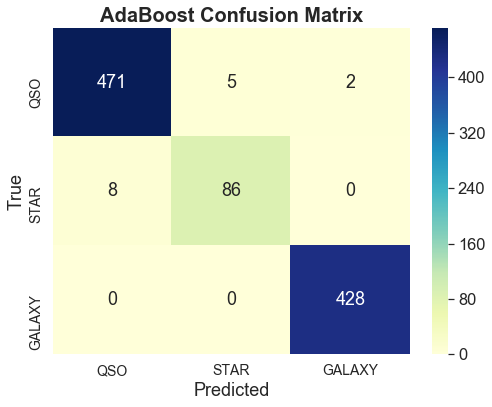

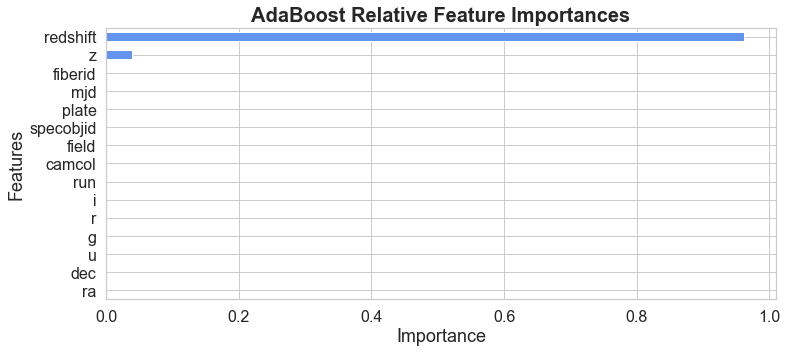

In [27]:
# adaboost
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=42)
params = {
    'algorithm': ['SAMME', 'SAMME.R'],
    'n_estimators': [25, 50, 100, 200],
    'learning_rate': [0.25, 0.5, 0.75, 1]
    }
model_ada = GridSearchCV(ada, params, cv=10, scoring='accuracy')
model_ada.fit(x_train_s, y_train)
pred_ada = model_ada.predict(x_test_s)

val_acc_ada = model_ada.best_score_
test_acc_ada = accuracy_score(y_test, pred_ada)
test_f1_ada = f1_score(y_test, pred_ada, average='weighted')

print('AdaBoost')
print('-'*90)
print('Best Model:', model_ada.best_estimator_)
print('Best Hyperparameters:', model_ada.best_params_)
print('\nValidation Accuracy:', round(val_acc_ada, 3))
print('Test Accuracy:', round(test_acc_ada, 3))
print('Test F1 Score:', round(test_f1_ada, 3))
print('\nTest Classification Report:\n', classification_report(y_test, pred_ada))

plt.figure(figsize=(8, 6)) 
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_ada), annot=True, fmt='d', cmap='YlGnBu', ax=ax);
plt.title('AdaBoost Confusion Matrix', fontsize=20, fontweight='bold')
plt.ylabel('True', fontsize=18)
plt.xlabel('Predicted', fontsize=18)
ax.xaxis.set_ticklabels(set(y_test), fontsize=14) 
ax.yaxis.set_ticklabels(set(y_test), fontsize=14);
plt.show();

feat_imp = pd.Series(model_ada.best_estimator_.feature_importances_, index=x.columns)
feat_imp.sort_values().plot(kind='barh', figsize=(12, 5), color='cornflowerblue')
plt.ylabel('Features', fontsize=18);
plt.xlabel('Importance',fontsize=18);
plt.title('AdaBoost Relative Feature Importances', fontsize=20, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show();

- The hyperparameter search grid is setup for three parameters: the boosting algorithm `algorithm`, the maximum number of estimators at which boosting is terminated `n_estimators`, and the rate at which the contribution of each classifier shrinks `learning_rate`. `algorithm` searches through *SAMME* (discrete boosting) and *SAMME.R* (real boosting) algorithms. `n_estimators` looks at 25, 50, 100, and 200. `learning_rate` checks 0.25, 0.50, 0.75, and 1. 
- The best model is found to use `algorithm` = 'SAMME', `learning_rate` = 0.75, and `n_estimators` = 25.
- The 10-fold cross-validation accurcy is 98.9%.
- The 10% testing set accuracy is 98.5%. The small gap between values indicates overfit is not an issue.
- The weighted testing set F1 score is 98.5%. The zero gap indicates the unbalanced class levels were not an issue.
- The test set classification report indicates that misclassification rate (precision) and positive point finding (recall) is roughly equal across class levels.
- The test set confusion matrix reveals that the largest misclassification is from *QSO* to *Galaxy* (8).
- The relative feature importances for best random forest model reveal that the **redshift** predictor is capable of achieving these results practically by itself (96.1%). For this model a second predictor is above one percent, **z** (3.86%).

### 5.10. Gradient Boosting Classification
The gradient boosting ensemble algorithm builds an additive model in stages. In each stage, `n_classes` decision trees are fit on the negative gradient of the multinomial (or binomial) differentiable loss function. This algorithm is greedy which causes each added tree to try to minimize the loss function given the previous ensemble.
The number of weak learners (decision trees) is controlled by the parameter `n_estimators` and the overfit (shrinkage) is controlled by the parameter `learning_rate`. Small values of `learning_rate` typically lead to better test error but large values of `n_estimators` are required to maintain a constant training error. The number of decision tree base learners also affects the level of variable interactions that can be captured by the gradient boosting model. 
Decision trees are common as the basis for gradient boosting because they have a number of valuable properties. For example, they can handle mixed type data and can model complex functions. 

Individual decision trees perform feature selection as a byproduct of selecting the appropriate split points. This information can be used to measure the importance of each feature since feature use in split points is correlated with feature importance. The feature importance of an ensemble is the average of the weak learner feature importances.

C:\Users\IBM\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Gradient Boosting
------------------------------------------------------------------------------------------
Best Model: GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=10, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=150,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
Best Hyperparameters: {'learning_rate': 0.1, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 150}

Validation Accuracy: 0.991
Test Accuracy: 0.987
Test F1 Score: 0.987

Test Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99 

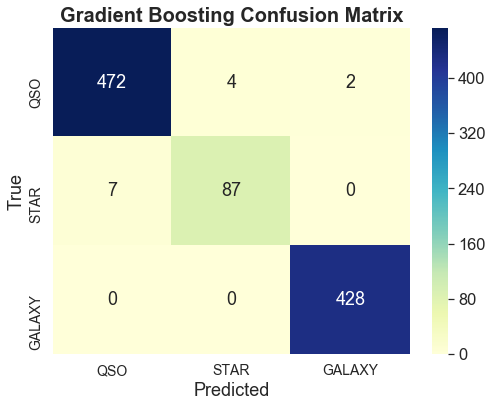

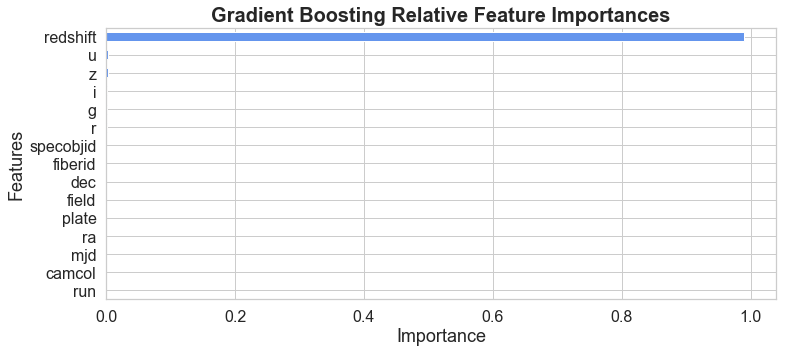

In [28]:
# gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(loss='deviance', random_state=42)
params = {
    'n_estimators': [25, 50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 3, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}
model_gb = GridSearchCV(gb, params, cv=10, scoring='accuracy')
model_gb.fit(x_train_s, y_train)
pred_gb = model_gb.predict(x_test_s)

val_acc_gb = model_gb.best_score_
test_acc_gb = accuracy_score(y_test, pred_gb)
test_f1_gb = f1_score(y_test, pred_gb, average='weighted')

print('Gradient Boosting')
print('-'*90)
print('Best Model:', model_gb.best_estimator_)
print('Best Hyperparameters:', model_gb.best_params_)
print('\nValidation Accuracy:', round(val_acc_gb, 3))
print('Test Accuracy:', round(test_acc_gb, 3))
print('Test F1 Score:', round(test_f1_gb, 3))
print('\nTest Classification Report:\n', classification_report(y_test, pred_gb))

plt.figure(figsize=(8, 6)) 
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_gb), annot=True, fmt='d', cmap='YlGnBu', ax=ax);
plt.title('Gradient Boosting Confusion Matrix', fontsize=20, fontweight='bold')
plt.ylabel('True', fontsize=18)
plt.xlabel('Predicted', fontsize=18)
ax.xaxis.set_ticklabels(set(y_test), fontsize=14) 
ax.yaxis.set_ticklabels(set(y_test), fontsize=14);
plt.show();

feat_imp = pd.Series(model_gb.best_estimator_.feature_importances_, index=x.columns)
feat_imp.sort_values().plot(kind='barh', figsize=(12, 5), color='cornflowerblue')
plt.ylabel('Features', fontsize=18);
plt.xlabel('Importance',fontsize=18);
plt.title('Gradient Boosting Relative Feature Importances', fontsize=20, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show();

- The hyperparameter search grid is setup for five parameters: the number of boosting stages to perform `n_estimators`, the rate at which the contribution of each tree shrinks `learning_rate`, the minimum number of samples required to split an internal node `min_samples_split`, the  minimum number of samples required to be at a leaf node `min_samples_leaf`, and the number of features to consider when looking for the best split `max_features`. `n_estimators` searches through 25, 50, 100, and 150. `learning_rate` looks at 0.01, 0.1, 0.5, and 1. `min_samples_split` checks 2, 5, 10, and 20. `min_samples_leaf` assesses 1, 3, 5, and 10. `max_features` loops through *sqrt* ( sqrt(n_features) ), *log2* ( log2(n_features) ) and None ( n_features ).
- The best model is found to use `learning_rate` = 0.1, `max_features` = None, `min_samples_leaf` = 10, `min_samples_split` = 2, and `n_estimators` = 150.
- The 10-fold cross-validation accurcy is 99.1%.
- The 10% testing set accuracy is 98.7%. The small gap between values indicates overfit is not an issue.
- The weighted testing set F1 score is 98.7%. The zero gap indicates the unbalanced class levels were not an issue.
- The test set classification report indicates that misclassification rate (precision) and positive point finding (recall) is roughly equal across class levels.
- The test set confusion matrix reveals that the largest misclassification is from QSO to Galaxy (7).
- The relative feature importances for best random forest model reveal that the redshift predictor is capable of achieving these results practically by itself (98.9%). For this model,there are no other predictors above one percent.

### 5.11. Final Model Comparison

Plot the performance metrics.

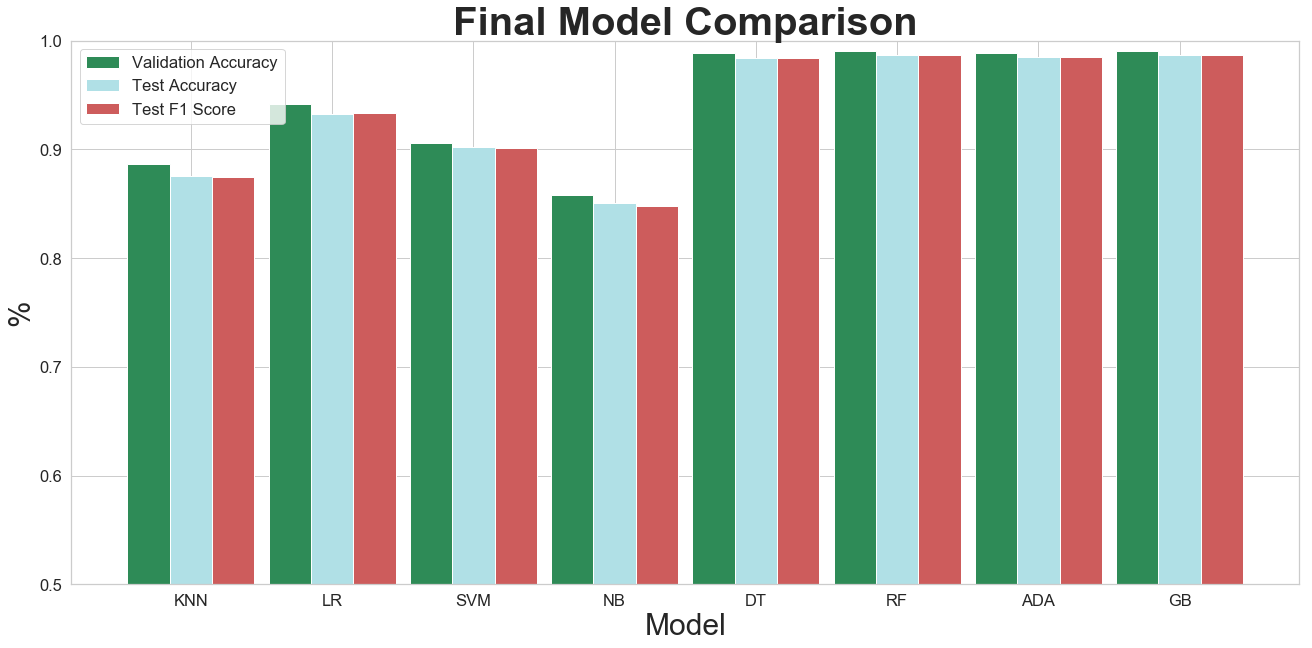

In [42]:
# model metric visualization
import numpy as np

models = ['KNN', 'LR', 'SVM', 'NB', 'DT', 'RF', 'ADA', 'GB']
model_val_acc = [val_acc_knn, val_acc_lr, val_acc_svm, val_acc_nb, val_acc_dt, val_acc_rf, val_acc_ada, val_acc_gb]
model_test_acc = [test_acc_knn, test_acc_lr, test_acc_svm, test_acc_nb, test_acc_dt, test_acc_rf, test_acc_ada, test_acc_gb]
model_test_f1 = [test_f1_knn, test_f1_lr, test_f1_svm, test_f1_nb, test_f1_dt, test_f1_rf, test_f1_ada, test_f1_gb]
 
barWidth = 0.30
r1 = np.arange(len(model_val_acc))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(22, 10))
plt.bar(r1, model_val_acc, color='seagreen', width=barWidth, edgecolor='white', label='Validation Accuracy')
plt.bar(r2, model_test_acc, color='powderblue', width=barWidth, edgecolor='white', label='Test Accuracy')
plt.bar(r3, model_test_f1, color='indianred', width=barWidth, edgecolor='white', label='Test F1 Score')
plt.title('Final Model Comparison', fontsize=40, fontweight='bold')
plt.ylabel('%', fontsize=30)
plt.xlabel('Model', fontsize=30)
plt.xticks([r + barWidth for r in range(len(model_val_acc))], models) 
plt.legend(loc='upper left')
axes = plt.gca()
axes.set_ylim((0.5, 1))
plt.show();

[[table of contents]](#0.-Table-of-Contents)

## 6. Interpret the Results

Two clustering and eight machine learning algorithms have been applied toward solving this problem. By and large, results are excellent.
- The maximum Variance Ratio in K-Means Clustering is for 3 clusters which is consistent with the problem context and expectations. 
- Observations within the feature space are sparsely separated according to Density-Based Spatial Clustering of Applications with Noise (DBSCAN) Clustering in which performance is shown to improve with increasing between-points distance.
- The lowest validation accuracy from 10-folds cross-validation is 86% from the Naive Bayes Classifier. 
- The lowest test set accuracy (85%) and test set F1 score (85%) are also from the Naive Bayes model. 
- On the other side, the highest validaiton accuracy from 10-folds cross-validation is 99% from tree-based methods (Decision Tree, Random Forest, AdaBoost, and Gradient Boosting). 
- The highest test set accuracy (98%) and test set F1 score are from a set of the tree-based models (Random Forest and Gradient Boosting). 

Overfitting does not appear to be an issue due to the small difference in values between validation and testing set metrics. The inbalance between class levels (*Galaxy* = 45%, *Star* = 41.5%, *QSO* = 8.5%) does, however, affect the results for the K-Nearest Neighbors (KNN) and Naive Bayes (NB) classifiers. 
- For KNN, the ability for *QSO* to find positive samples (recall) is 74%; this is much lower than *Star* (84%) and *Galaxy* (94%). 
- For NB, the recall for both *QSO* (72%) and *Star* (74%) is much lower than for *Galaxy* (98%). 
- For the remaining models, precision and recall are not affected by the imbalance. 

Misclassification is highest for *Star* samples with *Galaxy* predictions in 4 of the 8 classifier models.
- NB improperly identifies 112 samples.
- Support Vector Machine (SVM) improperly identifies 71 samples.
- KNN improperly identfies 64 samples.
- Logistic Regression (LR) improperly identifies 32 samples. 

For the remaining 4 models, misclassification is highest for *QSO* samples to *Galaxy* predictions.
- Decision Tree incorrectly identifies 10 samples. 
- AdaBoost (ADA) incorrectly identifies 8 samples.
- Random Forest (RF) incorrectly identifies 8 samples.
- Gradient Boosting (GB) incorrectly identifies 7 samples.

### 6.1. Recommendations

Due to their superior performance on new data and ability to correctly identify observations in a class level without incorrectly labeling them, the tree-based ensemble methods are ideal for moving into production. This includes the Random Forest, AdaBoost and Gradient Boosting models. Decision Tree is not included due to the inherent high variance and potential for major shifts following the inclusion of new data. The ensemble methods are able to cancel out errors corresponding to individual trees and prevent improper heavy tuning of models on specific predictors (bagging). For AdaBoost and Gradient Boosting, the models are also built in stages to adjust hard-to-classify observations, making them easier to classify in future iterations (boosting). Since it may be impractical to implement more than one solution, the one classifier recommended for activated use is Gradient Boosting because of its slight edge in performance and increased tuning flexibility. This model will simplify the task of identifying Stars, Quasars, and Galaxies from collected data, allowing personnel the time and ability to focus their attention on more important matters.

### 6.2. Areas for Future Study

If this investigation is performed again the following ideas should be considered.

1. Expand the grid search for hyperparameters of the models.
2. Consider deep learning models. 
3. Add variables from other sources and remove predictors from this source to evaluate robust models.
4. Evaluate results on similar data from other time periods.

[[table of contents]](#0.-Table-of-Contents)